In [1]:
import numpy as np #import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplot library
%matplotlib inline
import nltk.classify.util
from astropy.table import Table, Column

In [2]:
data = pd.read_csv('Amazon.csv')
print(data.shape)
data.head(5)

(455000, 13)


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpScore,helpful
0,138806,138807,B000E63LME,A1CQGW1AOD0LF2,"Alena K. ""Alena""",1,2,2,1294185600,Not as pictured.,I was looking forward to try cranberry apple f...,0.5,False
1,469680,469681,B004ZIH4KM,A37S7U1OX2MCWI,Becky Cole,0,0,5,1349740800,seeds,"TY for everything. The seeds arrived quickly,...",NaN,False
2,238202,238203,B003ZXE9QA,A2OM6G73E64EQ9,jeff,0,0,5,1329264000,I'm addicted!,I've finally found the best cereal in the worl...,NaN,False
3,485307,485308,B001RVFERK,A25W349EE97NBK,Tangent4,1,1,4,1248307200,I wanted to love these...,I originally bought these chips because I'd he...,1.0,False
4,375283,375284,B000OQZNTS,A3CPPW0HUC07YS,Amy Nicolai,0,0,5,1333238400,Excellent chamomile tea,"Really excellent tea, flowers are visible in t...",NaN,False


AttributeError: max must be larger than min in range parameter.

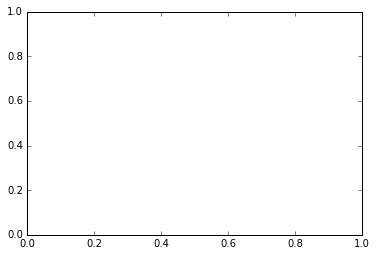

In [3]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(data["helpScore"])

# Show the plot.
plt.show()

In [4]:
#convert summary NaNs into usable format
data.Summary = data.Summary.fillna('none')

In [5]:
# features from Amazon.csv to add to feature set

# Features pulled from review txt
data['reviewLen'] = data['Text'].str.len() #captures the amount of strings present in the review (i.e. review length)
data['hasEP'] = data['Text'].str.contains('!') #captures the presences of an exclaimation point

# 1st Attempt to add punctuation 
data['hasSemi'] = data['Text'].str.contains(';') #captures the presences of a ;
data['hasColon'] = data['Text'].str.contains(':') #captures the presences of a :
data['hasAt'] = data['Text'].str.contains('@') #captures the presences of a @
data['hasDolla'] = data['Text'].str.contains('$') #captures the presences of a $
data['hasNumb'] = data['Text'].str.contains('#') #captures the presences of a #
data['hasAnd'] = data['Text'].str.contains('&') #captures the presences of a &

# 2nd Attempt adding punctuation that needs \ before (error the first time)
data['hasQuestion'] = data['Text'].str.contains('\?') #captures the presences of a ?
data['hasAsterick'] = data['Text'].str.contains('\*') #captures the presences of a *
data['hasFparenthesis'] = data['Text'].str.contains('\(') #captures the presences of a (
data['hasBparenthesis'] = data['Text'].str.contains('\)') #captures the presences of a )

# add counts for punctuation 
data['epCount'] = data['Text'].str.count('!')
data['semiCount'] = data['Text'].str.count(':')
data['atCount'] = data['Text'].str.count('@')
data['dollaCount'] = data['Text'].str.count('$')
data['numbCount'] = data['Text'].str.count('#')
data['andCount'] = data['Text'].str.count('&')
data['questionCount'] = data['Text'].str.count('\?')
data['asterickCount'] = data['Text'].str.count('\*')
data['fParenthesisCount'] = data['Text'].str.count('\(')
data['bParenthesisCount'] = data['Text'].str.count('\)')

# add punctuation count and ratio of punctuation to words -- thank you jon!
data['punctuationCount'] = data['Text'].str.count('[.,!;:()/\?-@#$&]') #captures total common punctuation count
data['punctuationToWords'] = data['punctuationCount'] / data['reviewLen'] #captures ratio of punctuation to words

# add certain words

# find repeating reviews
data['repeatTxt'] = data.duplicated('Text')

# add vars from profile name 
data['nameNumb'] = data['ProfileName'].str.contains('#') #captures profile name with a number sign
data['nameQuestion'] = data['ProfileName'].str.contains('\?')#captures profile name with a question mark
data['nameAsterick'] = data['ProfileName'].str.contains('\*') #captures profile name with an asterick
data['nameAnd'] = data['ProfileName'].str.contains('&') #captures the presences of a &
data['nameSemi'] = data['ProfileName'].str.contains(';') #captures the presences of a ;
data['nameColon'] = data['ProfileName'].str.contains(':') #captures the presences of a :
data['nameAt'] = data['ProfileName'].str.contains('@') #captures the presences of a @
data['nameDolla'] = data['ProfileName'].str.contains('$') #captures the presences of a $

# finding repeating profile names 
data['repeatProfile'] = data.duplicated('ProfileName')

# Features pulled from summary txt
data['summaryLen'] = data['Summary'].str.len() #captures the amount of strings present in the review (i.e. review length)
data['summaryEP'] = data['Summary'].str.contains('!') #captures the presences of an exclaimation point

# 1st Attempt to add punctuation 
data['summarySemi'] = data['Summary'].str.contains(';') #captures the presences of a ;
data['summaryColon'] = data['Summary'].str.contains(':') #captures the presences of a :
data['summaryAt'] = data['Summary'].str.contains('@') #captures the presences of a @
data['summaryDolla'] = data['Summary'].str.contains('$') #captures the presences of a $
data['summaryNumb'] = data['Summary'].str.contains('#') #captures the presences of a #
data['summaryAnd'] = data['Summary'].str.contains('&') #captures the presences of a &

# 2nd Attempt adding punctuation that needs \ before (error the first time)
data['summaryQuestion'] = data['Summary'].str.contains('\?') #captures the presences of a ?
data['summaryAsterick'] = data['Summary'].str.contains('\*') #captures the presences of a *
data['summaryFparenthesis'] = data['Summary'].str.contains('\(') #captures the presences of a (
data['summaryBparenthesis'] = data['Summary'].str.contains('\)') #captures the presences of a )

# add counts for punctuation 
data['summaryEpCount'] = data['Summary'].str.count('!')
data['summarySemiCount'] = data['Summary'].str.count(':')
data['summaryAtCount'] = data['Summary'].str.count('@')
data['summaryDollaCount'] = data['Summary'].str.count('$')
data['summaryNumbCount'] = data['Summary'].str.count('#')
data['summaryAndCount'] = data['Summary'].str.count('&')
data['summaryQuestionCount'] = data['Summary'].str.count('\?')
data['summaryAsterickCount'] = data['Summary'].str.count('\*')
data['summaryFParenthesisCount'] = data['Summary'].str.count('\(')
data['summaryBParenthesisCount'] = data['Summary'].str.count('\)')

# add punctuation count and ratio of punctuation to words -- thank you jon!
data['summaryPunctuationCount'] = data['Summary'].str.count('[.,!;:()/\?-@#$&]') #captures total common punctuation count
data['summaryPunctuationToWords'] = data['punctuationCount'] / data['summaryLen'] #captures ratio of punctuation to words

# add certain words

# find repeating reviews
data['summaryRepeatTxt'] = data.duplicated('Summary')



In [6]:
# Taking values and making vectors
XScore = data.iloc[:, 7].values.reshape(data.shape[0], 1)
XreviewLen = data.iloc[:, 13].values.reshape(data.shape[0], 1)
XhasEP = data.iloc[:, 14].values.reshape(data.shape[0], 1)
XhasSemi = data.iloc[:, 15].values.reshape(data.shape[0], 1)
XhasColon = data.iloc[:, 16].values.reshape(data.shape[0], 1)
hasAt = data.iloc[:, 17].values.reshape(data.shape[0], 1)
hasDolla = data.iloc[:, 18].values.reshape(data.shape[0], 1)
hasNumb = data.iloc[:, 19].values.reshape(data.shape[0], 1)
hasAnd = data.iloc[:, 20].values.reshape(data.shape[0], 1)
hasQuestion = data.iloc[:, 21].values.reshape(data.shape[0], 1)
hasAsterick = data.iloc[:, 22].values.reshape(data.shape[0], 1)
hasFparenthesis = data.iloc[:, 23].values.reshape(data.shape[0], 1)
hasBparenthesis = data.iloc[:, 24].values.reshape(data.shape[0], 1)
epCount = data.iloc[:, 25].values.reshape(data.shape[0], 1)
semiCount = data.iloc[:, 26].values.reshape(data.shape[0], 1)
atCount = data.iloc[:, 27].values.reshape(data.shape[0], 1)
dollaCount = data.iloc[:, 28].values.reshape(data.shape[0], 1)
numbCount = data.iloc[:, 29].values.reshape(data.shape[0], 1)
andCount = data.iloc[:, 30].values.reshape(data.shape[0], 1)
questionCount = data.iloc[:, 31].values.reshape(data.shape[0], 1)
asterickCount = data.iloc[:, 32].values.reshape(data.shape[0], 1)
fParenthesisCount = data.iloc[:, 33].values.reshape(data.shape[0], 1)
bParenthesisCount = data.iloc[:, 34].values.reshape(data.shape[0], 1)
punctuationCount = data.iloc[:, 35].values.reshape(data.shape[0], 1)
punctuationToWords = data.iloc[:, 36].values.reshape(data.shape[0], 1)
repeatTxt = data.iloc[:, 37].values.reshape(data.shape[0], 1)
nameNumb = data.iloc[:, 38].values.reshape(data.shape[0], 1)
nameQuestion = data.iloc[:, 39].values.reshape(data.shape[0], 1)
nameAsterick = data.iloc[:, 40].values.reshape(data.shape[0], 1)
nameAnd = data.iloc[:, 41].values.reshape(data.shape[0], 1)
nameSemi = data.iloc[:, 42].values.reshape(data.shape[0], 1)
nameColon = data.iloc[:, 43].values.reshape(data.shape[0], 1)
nameAt = data.iloc[:, 44].values.reshape(data.shape[0], 1)
nameDolla = data.iloc[:, 45].values.reshape(data.shape[0], 1)
repeatProfile = data.iloc[:, 46].values.reshape(data.shape[0], 1)
summaryLen = data.iloc[:, 47].values.reshape(data.shape[0], 1)
summaryEP = data.iloc[:, 48].values.reshape(data.shape[0], 1)
summarySemi = data.iloc[:, 49].values.reshape(data.shape[0], 1)
summaryColon = data.iloc[:, 50].values.reshape(data.shape[0], 1)
summaryAt = data.iloc[:, 51].values.reshape(data.shape[0], 1)
summaryDolla = data.iloc[:, 52].values.reshape(data.shape[0], 1)
summaryNumb = data.iloc[:, 53].values.reshape(data.shape[0], 1)
summaryAnd = data.iloc[:, 54].values.reshape(data.shape[0], 1)
summaryQuestion = data.iloc[:, 55].values.reshape(data.shape[0], 1)
summaryAsterick = data.iloc[:, 56].values.reshape(data.shape[0], 1)
summaryFparenthesis = data.iloc[:, 57].values.reshape(data.shape[0], 1)
summaryBparenthesis = data.iloc[:, 58].values.reshape(data.shape[0], 1)
summaryEpCount = data.iloc[:, 59].values.reshape(data.shape[0], 1)
summarySemiCount = data.iloc[:, 60].values.reshape(data.shape[0], 1)
summaryAtCount = data.iloc[:, 61].values.reshape(data.shape[0], 1)
summaryDollaCount = data.iloc[:, 62].values.reshape(data.shape[0], 1)
summaryNumbCount = data.iloc[:, 63].values.reshape(data.shape[0], 1)
summaryAndCount = data.iloc[:, 64].values.reshape(data.shape[0], 1)
summaryQuestionCount = data.iloc[:, 65].values.reshape(data.shape[0], 1)
summaryAsterickCount = data.iloc[:, 66].values.reshape(data.shape[0], 1)
summaryFParenthesisCount = data.iloc[:, 67].values.reshape(data.shape[0], 1)
summaryBParenthesisCount = data.iloc[:, 68].values.reshape(data.shape[0], 1)
summaryPunctuationCount = data.iloc[:, 69].values.reshape(data.shape[0], 1)
summaryPunctuationToWords = data.iloc[:, 70].values.reshape(data.shape[0], 1)
summaryRepeatTxt = data.iloc[:, 71].values.reshape(data.shape[0], 1)


In [7]:

Xtoadd = np.concatenate((XScore, 
                         XreviewLen, 
                         XhasEP, 
                         XhasSemi, 
                         XhasColon, 
                         hasAt, 
                         hasDolla, 
                         hasNumb, 
                         hasAnd, 
                         hasQuestion, 
                         hasAsterick, 
                         hasFparenthesis, 
                         hasBparenthesis, 
                         epCount, 
                         semiCount, 
                         atCount, 
                         dollaCount, 
                         numbCount, 
                         andCount, 
                         questionCount, 
                         asterickCount, 
                         fParenthesisCount, 
                         bParenthesisCount, 
                         punctuationCount, 
                         punctuationToWords, 
                         repeatTxt, 
                         nameNumb, 
                         nameQuestion, 
                         nameAsterick, 
                         nameAnd, 
                         nameSemi, 
                         nameColon, 
                         nameAt, 
                         nameDolla, 
                         repeatProfile, 
                         summaryLen, 
                         summaryEP, 
                         summarySemi, 
                         summaryColon, 
                         summaryAt, 
                         summaryDolla, 
                         summaryNumb, 
                         summaryAnd, 
                         summaryQuestion, 
                         summaryAsterick, 
                         summaryFparenthesis, 
                         summaryBparenthesis, 
                         summaryEpCount, 
                         summarySemiCount, 
                         summaryAtCount, 
                         summaryDollaCount, 
                         summaryNumbCount, 
                         summaryAndCount, 
                         summaryQuestionCount, 
                         summaryAsterickCount, 
                         summaryFParenthesisCount, 
                         summaryBParenthesisCount, 
                         summaryPunctuationCount, 
                         summaryPunctuationToWords, 
                         summaryRepeatTxt), axis=1)

data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,summaryDollaCount,summaryNumbCount,summaryAndCount,summaryQuestionCount,summaryAsterickCount,summaryFParenthesisCount,summaryBParenthesisCount,summaryPunctuationCount,summaryPunctuationToWords,summaryRepeatTxt
0,138806,138807,B000E63LME,A1CQGW1AOD0LF2,"Alena K. ""Alena""",1,2,2,1294185600,Not as pictured.,...,1,0,0,0,0,0,0,1,0.125000,False
1,469680,469681,B004ZIH4KM,A37S7U1OX2MCWI,Becky Cole,0,0,5,1349740800,seeds,...,1,0,0,0,0,0,0,0,0.600000,False
2,238202,238203,B003ZXE9QA,A2OM6G73E64EQ9,jeff,0,0,5,1329264000,I'm addicted!,...,1,0,0,0,0,0,0,1,1.076923,False
3,485307,485308,B001RVFERK,A25W349EE97NBK,Tangent4,1,1,4,1248307200,I wanted to love these...,...,1,0,0,0,0,0,0,3,1.240000,False
4,375283,375284,B000OQZNTS,A3CPPW0HUC07YS,Amy Nicolai,0,0,5,1333238400,Excellent chamomile tea,...,1,0,0,0,0,0,0,0,0.260870,False


In [9]:
# report on training and test sets
def print_results():
    print('Error rate on training set: ')
    print((y_train != y_pred).sum() / X_train.shape[0])
    print('Accuracy rate on training set: ')
    print(1 - (y_train != y_pred).sum() / X_train.shape[0])
    print('True positive rate on training tet:')
    print(((y_train==True) & (y_pred==True)).sum() / y_train.sum())
    print('**************')
    print('Error rate on test set: ')
    print((y_test != y_pred_test).sum() / X_test.shape[0])
    print('Accuracy rate on test set: ')
    print(1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    print('True positive rate on test set')
    print(((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    print('True negative rate on test set')
    print(((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))

In [10]:
# # vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# X = hv.transform(data.Text)

# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
X = hv.transform(data.Text)

In [11]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([X, XtoaddSparse])
X = csr_matrix(Xfinal)

TypeError: no supported conversion for types: (dtype('O'),)

In [14]:
# size of feature set
print(X.shape)

(455000, 131072)


In [15]:
# define y
y = data.iloc[:, 12].values
y.shape

(455000,)

In [16]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [17]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

TypeError: print_results() takes 0 positional arguments but 1 was given

In [19]:
# MODEL: logistic regression
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Logistic Regression')

TypeError: print_results() takes 0 positional arguments but 1 was given

In [20]:
# MODEL: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Naive Bayes')

TypeError: print_results() takes 0 positional arguments but 1 was given

In [21]:
# Perceptron
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='perceptron')
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Perceptron')

TypeError: print_results() takes 0 positional arguments but 1 was given